In [40]:
from collections import namedtuple
from random import randint, uniform
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Point = namedtuple('Point', 'x y')
Node = namedtuple('Node', 'id pos parent')
Region = namedtuple('Region', 'pos width height')  # bottom left x,y

WORLD_SIZE = 100
GOAL_CHANCE = 0.01
velocity = 1


def dist(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1.y - point2.y) ** 2)


def in_region(point, region):
    return region.pos[0] <= point[0] <= region.pos[0] + region.width \
           and region.pos.y <= point.y <= region.pos.y + region.height


def in_regions(point, regions):
    for region in regions:
        if in_region(point, region):
            return True
    return False

def in_map(point, m_map):
    return m_map[int(point.x), int(point.y)] != 1

def get_closest(nodes, point):
    """
    Return the node in the list that's closest to the given point
    """
from collections import namedtuple
from random import randint, uniform
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Point = namedtuple('Point', 'x y')
Node = namedtuple('Node', 'id pos parent')
Region = namedtuple('Region', 'pos width height')  # bottom left x,y

WORLD_SIZE_X = 100
WORLD_SIZE_Y = 100

GOAL_CHANCE = 0.01
velocity = 1


def dist(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1.y - point2.y) ** 2)


def in_region(point, region):
    return region.pos[0] <= point[0] <= region.pos[0] + region.width \
           and region.pos.y <= point.y <= region.pos.y + region.height


def in_regions(point, regions):
    for region in regions:
        if in_region(point, region):
            return True
    return False


def get_closest(nodes, point):
    """
    Return the node in the list that's closest to the given point
    """
    return min(nodes, key=lambda x: dist(x.pos, point))


def steer(point1, point2):
    """
    Return an intermediate point on the line between point1 and point2
    """
    total_offset = abs(point2.x - point1.x) + abs(point2.y - point1.y)
    x = point1.x + velocity * ((point2.x - point1.x) / total_offset)
    y = point1.y + velocity * ((point2.y - point1.y) / total_offset)
    return Point(x, y)


def calculate_path(start, goal, obstacles):
    nodes = [Node(0, start, 0)]
    while True:
        if uniform(0, 1) < GOAL_CHANCE:
            z_rand = Point(goal.pos.x + goal.width / 2, goal.pos.y + goal.height / 2)
        else:
            z_rand = Point(randint(0, WORLD_SIZE_X), randint(0, WORLD_SIZE_Y))
        if in_regions(z_rand, obstacles):
            continue
        nearest = get_closest(nodes, z_rand)
        if z_rand == nearest.pos:
            continue

        new_pos = steer(nearest.pos, z_rand)
        if in_regions(new_pos, obstacles):
            continue
        nodes.append(Node(len(nodes), new_pos, nearest.id))

        if len(nodes) % 100 == 0:
            print("{} Nodes Searched".format(len(nodes)))

        if in_region(new_pos, goal):
            return nodes


# if __name__ == '__main__':
#     start_pos = Point(WORLD_SIZE / 4, WORLD_SIZE / 4)
#     end_region = Region(Point(3 * WORLD_SIZE / 4, 3 * WORLD_SIZE / 4), 10, 10)
#     obstacles = [
#         Region(Point(0, 30), 80, 10),
#         Region(Point(20, 60), 80, 10)
#     ]
#     nodes = calculate_path(start_pos, end_region, obstacles)
#     node_count = len(nodes)
#     print("Nodes Calculated {}".format(node_count))
#     fig = plt.figure(1)


#     def plot_nodes(nodes, subplot):
#         axes = fig.add_subplot(subplot, aspect='equal')
#         for node in nodes:
#             parent = nodes[node.parent]
#             plt.plot([node.pos.x, parent.pos.x], [node.pos.y, parent.pos.y], 'k-')

#         for obstacle in obstacles:
#             axes.add_patch(patches.Rectangle(obstacle.pos, obstacle.width, obstacle.height, color=(0, 0, 0, .3)))

#         axes.plot(start_pos.x, start_pos.y, 'ro')
#         axes.add_patch(patches.Rectangle(end_region.pos, end_region.width, end_region.height, color='g'))
#         axes.set_title("{} Points".format(len(nodes)))
#         axes.set_xlim([0, WORLD_SIZE])
#         axes.set_ylim([0, WORLD_SIZE])


#     nodes.sort(key=lambda n: n.id)
#     plot_nodes(nodes[:100], 221)
#     plot_nodes(nodes[:500], 222)
#     plot_nodes(nodes[:1000], 223)
#     plot_nodes(nodes, 224)

#     # Highlight path from goal back to start position
#     current_node = nodes[-1]
#     while current_node.id != 0:
#         parent = nodes[current_node.parent]
#         plt.plot([current_node.pos.x, parent.pos.x], [current_node.pos.y, parent.pos.y], 'b-', linewidth=2.0)
#         current_node = parent

#     plt.show()

#     return min(nodes, key=lambda x: dist(x.pos, point))


def steer(point1, point2):
    """
    Return an intermediate point on the line between point1 and point2
    """
    total_offset = abs(point2.x - point1.x) + abs(point2.y - point1.y)
    x = point1.x + velocity * ((point2.x - point1.x) / total_offset)
    y = point1.y + velocity * ((point2.y - point1.y) / total_offset)
    return Point(x, y)


def calculate_path(start, goal, obstacles, asmap = False):
    nodes = [Node(0, start, 0)]
    while True:
        if uniform(0, 1) < GOAL_CHANCE:
            z_rand = Point(goal.pos.x + goal.width / 2, goal.pos.y + goal.height / 2)
        else:
            z_rand = Point(randint(0, WORLD_SIZE_X), randint(0, WORLD_SIZE_Y))
        if (not asmap and in_regions(z_rand, obstacles)) or (asmap and in_map(z_rand, obstacles)):
            continue
        nearest = get_closest(nodes, z_rand)
        if z_rand == nearest.pos:
            continue

        new_pos = steer(nearest.pos, z_rand)
        if (not asmap and in_regions(new_pos, obstacles)) or (asmap and in_map(new_pos, obstacles)):
            continue
            
        nodes.append(Node(len(nodes), new_pos, nearest.id))

        if len(nodes) % 100 == 0:
            print("{} Nodes Searched".format(len(nodes)))

        if in_region(new_pos, goal):
            return nodes


In [23]:
import pickle 
pointsToSample = 10

map_struct = pickle.load(open("../map_generation/map.pickle", "rb"))
map_occupied = map_struct['map']  # Binary map
map_rgb = np.stack([(map_occupied == 0) * 255 for i in range(3)],
                   axis=-1).astype(np.uint8)  # Black White 3 channel image
lengthPerPixel = map_struct['dimensions'][
    'lengthPerPixel']  # Conversion from pixel to meters in unreal
top_start, left_start = map_struct['start']['top'], map_struct['start'][
    'left']  # Start position of the dron
top_lim, left_lim = map_occupied.shape

In [41]:
in_map(start_pos, mmap)

True

In [38]:
mmap[start_pos.x, start_pos.y]

False

In [26]:
WORLD_SIZE_X = left_lim
WORLD_SIZE_Y = top_lim

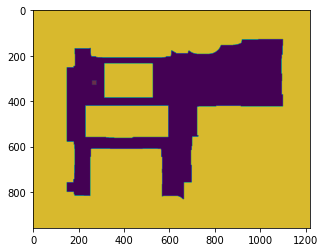

In [37]:
plt.imshow(map_occupied == 1)
m = 0*map_occupied
m[start_pos.x - 10:start_pos.x + 10, start_pos.y - 10 : start_pos.y + 10] = 10
plt.imshow(m, alpha = 0.2)

In [42]:
start_pos = Point(319, 270)
end_region = Region(Point(319, 541), 10, 10)

mmap = map_occupied
nodes = calculate_path(start_pos, end_region, mmap, asmap=True)
node_count = len(nodes)
print("Nodes Calculated {}".format(node_count))
fig = plt.figure(1)


def plot_nodes(nodes, subplot):
    axes = fig.add_subplot(subplot, aspect='equal')
    for node in nodes:
        parent = nodes[node.parent]
        plt.plot([node.pos.x, parent.pos.x], [node.pos.y, parent.pos.y], 'k-')

    axes.plot(start_pos.x, start_pos.y, 'ro')
    axes.imshow(mmap)
#     axes.add_patch(patches.Rectangle(end_region.pos, end_region.width, end_region.height, color='g'))
    axes.set_title("{} Points".format(len(nodes)))
    axes.set_xlim([0, WORLD_SIZE_X])
    axes.set_ylim([0, WORLD_SIZE_Y])


nodes.sort(key=lambda n: n.id)
plot_nodes(nodes[:100], 221)
plot_nodes(nodes[:500], 222)
plot_nodes(nodes[:1000], 223)
plot_nodes(nodes, 224)

# Highlight path from goal back to start position
current_node = nodes[-1]
while current_node.id != 0:
    parent = nodes[current_node.parent]
    plt.plot([current_node.pos.x, parent.pos.x], [current_node.pos.y, parent.pos.y], 'b-', linewidth=2.0)
    current_node = parent

plt.show()


KeyboardInterrupt: 